<a href="https://colab.research.google.com/github/Khalid655-dev/Tomato-Leaf-Disease-Detection/blob/main/Decreased98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Decreased)/train'
valid_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Decreased)/valid'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

Loading The previously Saved model of Accuracy 97.72:

In [ ]:
loaded_model_h5 = tf.keras.models.load_model('/content/drive/MyDrive/ReFineTuned98.h5')

In [ ]:
loaded_model_h5.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(loaded_model_h5.layers))

Number of layers in the base model:  134


Fine-Tuning:

In [ ]:
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in loaded_model_h5.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
len(loaded_model_h5.trainable_variables)

41

In [ ]:
loaded_model_h5.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=180,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   vertical_flip=True,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Decreased)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle=True,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Decreased)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 3950 images belonging to 10 classes.
Found 1970 images belonging to 10 classes.


In [ ]:
learning_rate = 0.0001

In [ ]:
loaded_model_h5.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate/10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# fit the model
es = EarlyStopping(patience=20, restore_best_weights=True)

r = loaded_model_h5.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=es
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/90
124/124 [==============================] - 91s 734ms/step - loss: 0.0172 - accuracy: 0.9962 - val_loss: 0.0991 - val_accuracy: 0.9807
Epoch 2/90
124/124 [==============================] - 92s 738ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.1045 - val_accuracy: 0.9782
Epoch 3/90
124/124 [==============================] - 92s 741ms/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.0975 - val_accuracy: 0.9807
Epoch 4/90
124/124 [==============================] - 92s 744ms/step - loss: 0.0189 - accuracy: 0.9934 - val_loss: 0.1004 - val_accuracy: 0.9787
Epoch 5/90
124/124 [==============================] - 94s 753ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.1030 - val_accuracy: 0.9777
Epoch 6/90
124/124 [==============================] - 93s 751ms/step - loss: 0.0114 - accuracy: 0.9970 - val_loss: 0.1169 - val_accuracy: 0.9761
Epoch 7/90
124/124 [==============================] - 93s 746ms/step - loss: 0.0119 - accuracy: 0.9975 - val_loss: 0.1050 - val_ac

In [ ]:
valid_loss, valid_acc = loaded_model_h5.evaluate_generator(test_set, steps=len(test_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Final validation accuracy: 98.12%


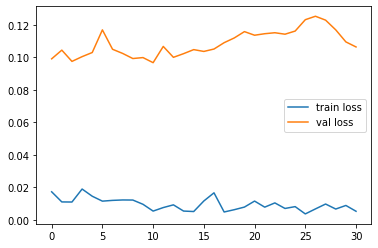

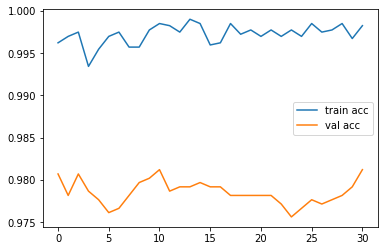

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Acc-Val_acc')

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a model in model directory
  """
  import os
  print(os.getcwd())

  modeldir = "/content/drive/MyDrive/"
  model_path = f"{modeldir}ReTrained98.h5"
  print(f"saving model: {model_path}...")
  loaded_model_h5.save(model_path)

In [ ]:
save_model(loaded_model_h5)
print("Model saved successfully...")

/content
saving model: /content/drive/MyDrive/ReTrained98.h5...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Model saved successfully...


In [ ]:
loss, accuracy = loaded_model_h5.evaluate(test_set)
print('Test accuracy :', accuracy)

62/62 [==============================] - 19s 299ms/step - loss: 0.0967 - accuracy: 0.9812
Test accuracy : 0.9812182784080505


In [ ]:
loss, accuracy = loaded_model_h5.evaluate(training_set)
print('Training accuracy :', accuracy)

124/124 [==============================] - 67s 541ms/step - loss: 0.0042 - accuracy: 0.9987
Training accuracy : 0.998734176158905
